In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt

In [18]:
!pip install opencv-python

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\fazalerabbi\anaconda3\envs\fazal\python.exe' 'C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\FAZALE~1\AppData\Local\Temp\tmpxk24z06z'
       cwd: C:\Users\FAZALE~1\AppData\Local\Temp\pip-install-_sxs206j\opencv-python_2059dd5e65734f7a8f3dff08fe8c4860
  Complete output (193 lines):
  
  
  --------------------------------------------------------------------------------
  -- Trying 'Ninja (Visual Studio 17 2022 x64 v143)' generator
  --------------------------------
  ---------------------------
  ----------------------
  -----------------
  ------------
  -------

  Using cached opencv-python-4.7.0.72.tar.gz (91.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build opencv-python



  --
  Not searching for unused variables given on the command line.
  CMake Error at CMakeLists.txt:2 (PROJECT):
    Generator
  
      Ninja
  
    does not support platform specification, but platform
  
      x64
  
    was specified.
  
  
  -- Configuring incomplete, errors occurred!
  --
  -------
  ------------
  -----------------
  ----------------------
  ---------------------------
  --------------------------------
  -- Trying 'Ninja (Visual Studio 17 2022 x64 v143)' generator - failure
  --------------------------------------------------------------------------------
  
  
  
  --------------------------------------------------------------------------------
  -- Trying 'Visual Studio 17 2022 x64 v143' generator
  --------------------------------
  ---------------------------
  ----------------------
  -----------------
  ------------
  -------
  --
  Not searching for unused variables given on the command line.
  -- Selecting Windows SDK version 10.0.22621.0 to target Win

In [85]:
import os 
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [86]:
img=image.load_img('dataset/train/andrew/1.jpg')

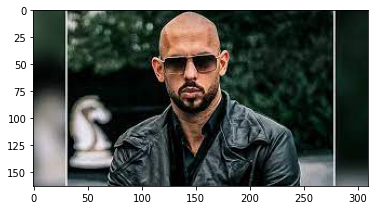

In [87]:
plt.imshow(img)

In [88]:
train=ImageDataGenerator(rescale=1/255.0)

In [89]:
val=ImageDataGenerator(rescale=1/255.0)

In [90]:
train_dataset=train.flow_from_directory('dataset/train',target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary'
                                       )


Found 14 images belonging to 2 classes.


In [91]:
val_dataset=val.flow_from_directory('dataset/val',target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary'
                                       )

Found 10 images belonging to 2 classes.


In [92]:
train_dataset.class_indices

{'andrew': 0, 'notandrew': 1}

In [93]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
    
                          
    
])

In [94]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             metrics=['accuracy'])

C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [95]:
modelfit=model.fit(train_dataset,steps_per_epoch=5,epochs=30,
                  validation_data=val_dataset)

Epoch 1/30
5/5 [==============================] - 2s 251ms/step - loss: 7.7889 - accuracy: 0.3571 - val_loss: 2.2450 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 1s 203ms/step - loss: 1.7500 - accuracy: 0.5000 - val_loss: 1.0640 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 1s 211ms/step - loss: 0.8843 - accuracy: 0.4286 - val_loss: 0.6382 - val_accuracy: 0.6000
Epoch 4/30
5/5 [==============================] - 1s 205ms/step - loss: 0.3435 - accuracy: 1.0000 - val_loss: 0.5521 - val_accuracy: 0.9000
Epoch 5/30
5/5 [==============================] - 1s 208ms/step - loss: 0.1614 - accuracy: 1.0000 - val_loss: 0.5216 - val_accuracy: 0.8000
Epoch 6/30
5/5 [==============================] - 1s 205ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 0.8535 - val_accuracy: 0.5000
Epoch 7/30
5/5 [==============================] - 1s 206ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.5937 - val_accuracy: 0.8000
Epoch 8/30
5/5 [====

In [123]:
yr =image.load_img('dataset/test/11.jpg',target_size=(200,200))

In [124]:
X=image.img_to_array(yr)

In [125]:
yr=np.expand_dims(X,axis=0)

In [126]:
yr.shape

(1, 200, 200, 3)

In [127]:
s=model.predict(yr)
if s==0:
    print('andrew')
else:
    print("not andrew")

andrew


In [128]:
print(s)

[[0.]]


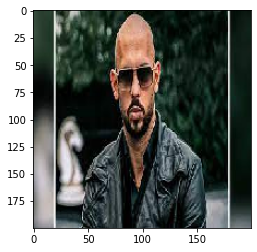

ValueError: in user code:

    C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\keras\engine\functional.py:415 call
        inputs, training=training, mask=mask)
    C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\keras\engine\input_spec.py:218 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer max_pooling2d is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, 1, 198, 198, 16)


In [36]:
for i in os.listdir(test_path):
    img=image.load_img(test_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.stack([X])
    vray=model.predict(images)
    if vray== 0:
        print("tate")
    else :
       print("not tate ")